In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CREAMOS LOS DATAFRAMES

In [324]:
# PK = {'establecimiento'}
df_estab_prod = pd.DataFrame(columns=['establecimiento', 'departamento', 'clae2', 'prop_muj','letra'])

In [325]:
# PK = {'establecimiento', 'productos'}
df_prod_org = pd.DataFrame(columns=['productos', 'establecimiento'])

In [326]:
# PK = {'clae2'}
df_dicc_clae = pd.DataFrame(columns = ['clae2, clae2_desc'])

In [327]:
# PK = {'nom_depto'}
df_deptos = pd.DataFrame(columns = ['nom_depto', 'nom_prov'])

In [328]:
# PK = {'departamento', 'razon_social'}
df_oper_org = pd.DataFrame(columns=['establecimiento', 'razon_social'])

In [329]:
# PK = {'provincia_id'}
df_prov = pd.DataFrame(columns=['provincia_id', 'provincia'])

# IMPORTAMOS FUENTES PRIMARIAS Y SECUNDARIAS

In [330]:
import csv
import os

cwd = os.getcwd()

# comentario6

padron = os.path.join(cwd, "padron.csv")
establecimientos = r"C:\Users\jerem\OneDrive\Escritorio\Facultad\TP1_Labo_de_Datos\establecimientos.csv"
localidad_bahra = r"C:\Users\jerem\OneDrive\Escritorio\Facultad\TP1_Labo_de_Datos\localidad_bahra.csv"
clae_agg = r"C:\Users\jerem\OneDrive\Escritorio\Facultad\TP1_Labo_de_Datos\clae_agg.csv"

with open(padron, 'r', encoding='utf-8', errors='replace') as file:
    padron = file.read()
with open(establecimientos, 'r', encoding='utf-8', errors='replace') as file:
    establecimiento = file.read()
with open(localidad_bahra, 'r', encoding='utf-8', errors='replace') as file:
    localidades = file.read()
with open(clae_agg, 'r', encoding='utf-8', errors='replace') as file:
    clae_agg = file.read()

from io import StringIO
df_padron = pd.read_csv(StringIO(padron))
df_establecimiento = pd.read_csv(StringIO(establecimiento))
df_localidades = pd.read_csv(StringIO(localidades))
df_clae = pd.read_csv(StringIO(clae_agg))

Arreglamos inconsistencias de los dataframes originales.

In [ ]:
df_padron[df_padron[]]

# Analisis Exploratorio

In [331]:
df_establecimiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706498 entries, 0 to 706497
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  706498 non-null  object 
 1   departamento        706498 non-null  object 
 2   provincia           706498 non-null  object 
 3   lat                 706498 non-null  float64
 4   lon                 706498 non-null  float64
 5   in_departamentos    706498 non-null  int64  
 6   provincia_id        706498 non-null  int64  
 7   empleo              706498 non-null  object 
 8   clae6               706498 non-null  int64  
 9   clae2               706498 non-null  int64  
 10  letra               706498 non-null  object 
 11  Tipo_coordenada     706498 non-null  object 
 12  proporcion_mujeres  706498 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 70.1+ MB


In [332]:
df_padron.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   pais_id             1395 non-null   int64 
 1   pais                1395 non-null   object
 2   provincia_id        1395 non-null   int64 
 3   provincia           1395 non-null   object
 4   departamento        1395 non-null   object
 5   localidad           1395 non-null   object
 6   rubro               1390 non-null   object
 7   productos           1393 non-null   object
 8   categoria_id        1395 non-null   int64 
 9   categoria_desc      1395 non-null   object
 10  Certificadora_id    1395 non-null   int64 
 11  certificadora_deno  1395 non-null   object
 12  raz�n social        1395 non-null   object
 13  establecimiento     1395 non-null   object
dtypes: int64(4), object(10)
memory usage: 152.7+ KB


In [333]:
df_clae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clae6       950 non-null    int64 
 1   clae6_desc  950 non-null    object
 2   clae3       950 non-null    int64 
 3   clae3_desc  950 non-null    object
 4   clae2       950 non-null    int64 
 5   clae2_desc  950 non-null    object
 6   letra       950 non-null    object
 7   letra_desc  950 non-null    object
dtypes: int64(3), object(5)
memory usage: 59.5+ KB


In [334]:
df_localidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3528 entries, 0 to 3527
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FID                         3528 non-null   object 
 1   gid                         3528 non-null   int64  
 2   nombre_geografico           3528 non-null   object 
 3   tipo_asentamiento           3528 non-null   object 
 4   codigo_asentamiento         3528 non-null   int64  
 5   nombre_aglomerado           3522 non-null   object 
 6   codigo_aglomerado           3527 non-null   float64
 7   nombre_departamento         3528 non-null   object 
 8   codigo_indec_departamento   3528 non-null   object 
 9   nombre_provincia            3528 non-null   object 
 10  codigo_indec_provincia      3528 non-null   int64  
 11  latitud_grado_decimal       3528 non-null   float64
 12  longitud_grado_decimal      3528 non-null   float64
 13  latitud_grado_sexagecimal   3528 

In [335]:
df_establecimiento.head()

,ID,departamento,provincia,lat,lon,in_departamentos,provincia_id,empleo,clae6,clae2,letra,Tipo_coordenada,proporcion_mujeres
0,10000000018M51M5M2G1111111543049,Capital,Catamarca,-28.464,-65.785,10049,10,a. 1-9,949990,94,S,Exacta,1.0
1,1000000002MM0P1201G2020208914049,Capital,Catamarca,-28.464,-65.766,10049,10,a. 1-9,681098,68,L,Aproximada,0.0
2,1000000002MM1017P0G2020202577070,La Paz,Catamarca,-29.280,-65.060,10070,10,a. 1-9,89110,8,B,Exacta,0.0
3,1000000006681P86GG667501414147181049,Capital,Catamarca,-28.463,-65.796,10049,10,b. 10-49,11299,1,A,Aproximada,0.0
4,1000000007215MG51051616168109070,La Paz,Catamarca,-28.880,-65.140,10070,10,a. 1-9,14113,1,A,Aproximada,0.0


In [336]:
df_localidades.head()

,FID,gid,nombre_geografico,tipo_asentamiento,codigo_asentamiento,nombre_aglomerado,codigo_aglomerado,nombre_departamento,codigo_indec_departamento,nombre_provincia,codigo_indec_provincia,latitud_grado_decimal,longitud_grado_decimal,latitud_grado_sexagecimal,longitud_grado_sexagecimal,fuente_de_captura,geom
0,localidad_bahra.2555,2555,Reta,Localidad simple,6833070,Reta,2086.0,Tres Arroyos,06833,Buenos Aires,6,-38.894894,-60.344858,"-38º53'42""","-60º20'41""",INDEC,MULTIPOINT ((-60.34485806432177 -38.8948939829...
1,localidad_bahra.3528,3528,Olaeta,Localidad simple,14056120,Olaeta,2306.0,Juárez Celman,14056,Córdoba,14,-33.044761,-63.906067,"-33º 2'41""","-63º54'22""",INDEC,MULTIPOINT ((-63.906066644628076 -33.044761448...
2,localidad_bahra.4671,4671,Tabay,Localidad simple,18028030,Tabay,2511.0,Concepción,18028,Corrientes,18,-28.308136,-58.286866,"-28º18'29""","-58º17'13""",INDEC,MULTIPOINT ((-58.286865633583844 -28.308135912...
3,localidad_bahra.9740,9740,Zapala,Localidad simple,58112040,Zapala,97.0,Zapala,58112,Neuquén,58,-38.902934,-70.064211,"-38º54'11""","-70º 3'51""",INDEC,MULTIPOINT ((-70.06421121666217 -38.9029343545...
4,localidad_bahra.7,7,Rojas,Localidad simple,6686060,Rojas,151.0,Rojas,06686,Buenos Aires,6,-34.197742,-60.733701,"-34º11'52""","-60º44' 1""",INDEC,MULTIPOINT ((-60.73370069504291 -34.1977424290...


In [337]:
df_clae.head()

,clae6,clae6_desc,clae3,clae3_desc,clae2,clae2_desc,letra,letra_desc
0,14211,"Cría de ganado equino, excepto la realizada en...",14,Cría de animales,1,"Agricultura, ganadería, caza y servicios relac...",A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y ..."
1,11331,Cultivo de hortalizas de hoja y de otras horta...,11,Cultivos temporales,1,"Agricultura, ganadería, caza y servicios relac...",A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y ..."
2,14410,Cría de ganado ovino -excepto en cabañas y par...,14,Cría de animales,1,"Agricultura, ganadería, caza y servicios relac...",A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y ..."
3,11211,Cultivo de soja,11,Cultivos temporales,1,"Agricultura, ganadería, caza y servicios relac...",A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y ..."
4,17010,Caza y repoblación de animales de caza (Inclu...,17,"Caza, repoblación de animales de caza y serv...",1,"Agricultura, ganadería, caza y servicios relac...",A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y ..."


In [338]:
df_padron.head()

,pais_id,pais,provincia_id,provincia,departamento,localidad,rubro,productos,categoria_id,categoria_desc,Certificadora_id,certificadora_deno,raz�n social,establecimiento
0,32,ARGENTINA,6,BUENOS AIRES,BARADERO,INDEFINIDA,AGRICULTURA,SOJA,1,Productores,2,OIA S.A.,ADD CROPS S.A.,BARADERO 1
1,32,ARGENTINA,6,BUENOS AIRES,BARADERO,INDEFINIDA,AGRICULTURA,"GIRASOL, MIJO, RESIDUO VEGETAL",1,Productores,2,OIA S.A.,ADD CROPS S.A.,BARADERO 2
2,32,ARGENTINA,6,BUENOS AIRES,BARADERO,INDEFINIDA,AGRICULTURA,"MAIZ, AVENA, CAMPO NATURAL",1,Productores,2,OIA S.A.,ADD CROPS S.A.,EL BUEN RETIRO
3,32,ARGENTINA,6,BUENOS AIRES,AZUL,INDEFINIDA,AGRICULTURA,"SOJA, ALPISTE",1,Productores,3,Letis S.A.,AGRICOLA EL HORIZONTE S.A.,EL RELINCHO
4,32,ARGENTINA,6,BUENOS AIRES,AZUL,INDEFINIDA,AGRICULTURA,"SOJA, ALPISTE, TRIGO",1,Productores,3,Letis S.A.,AGRICOLA EL HORIZONTE S.A.,EL HORIZONTE


In [339]:
# Vemos que razon_social no implica departamento, ya que hay razones sociales con mas de un departamento (para elegir primary key).
razones_multiples_departamentos = df_padron.groupby('raz�n social')['departamento'].nunique()
razones_con_mas_de_un_departamento = razones_multiples_departamentos[razones_multiples_departamentos > 1]
razones_con_mas_de_un_departamento.sort_values(ascending=False)

raz�n social
KUMAGRO S.A.                                       8
GRUPO PE�AFLOR SA                                  7
PATAGONIAN FRUITS TRADE SA                         6
TERMINAL DE CARGAS AEREAS SA                       6
FUHRMANN S.A                                       5
                                                  ..
ESTANCIA LAGUNA VERDE S.A.                         2
ESTABLECIMIENTOS VITIVINICOLAS ESCORIHUELA S.A.    2
EMPRESA COMERCIAL EXPORTADORA S.A.                 2
EMAISA S.A.                                        2
VONO SA                                            2
Name: departamento, Length: 132, dtype: int64

In [340]:
# Ejemplo de razon social con mas de un departamento
df_padron[df_padron['raz�n social']=='KUMAGRO S.A.']

,pais_id,pais,provincia_id,provincia,departamento,localidad,rubro,productos,categoria_id,categoria_desc,Certificadora_id,certificadora_deno,raz�n social,establecimiento
59,32,ARGENTINA,6,BUENOS AIRES,ALVEAR,INDEFINIDA,AGRICULTURA,"MAIZ, CENTENO, DESCANSO, SOJA, ABONO VERDE",1,Productores,2,OIA S.A.,KUMAGRO S.A.,CAMPO ALVEAR
61,32,ARGENTINA,6,BUENOS AIRES,ALVEAR,INDEFINIDA,AGRICULTURA,"SOJA, ABONO VERDE",1,Productores,2,OIA S.A.,KUMAGRO S.A.,LOS PINOS
62,32,ARGENTINA,6,BUENOS AIRES,CARMEN DE ARECO,INDEFINIDA,AGRICULTURA,MAIZ,1,Productores,2,OIA S.A.,KUMAGRO S.A.,LA LUCIA II
63,32,ARGENTINA,6,BUENOS AIRES,CHACABUCO,INDEFINIDA,AGRICULTURA,MAIZ,1,Productores,2,OIA S.A.,KUMAGRO S.A.,MAC GRATH
64,32,ARGENTINA,6,BUENOS AIRES,CHIVILCOY,INDEFINIDA,AGRICULTURA,"SOJA, MAIZ",1,Productores,2,OIA S.A.,KUMAGRO S.A.,LOS PARAISOS
65,32,ARGENTINA,6,BUENOS AIRES,JUNIN,INDEFINIDA,AGRICULTURA,"SOJA, ARVEJA, MAIZ, RESIDUO VEGETAL",1,Productores,2,OIA S.A.,KUMAGRO S.A.,LA BLANQUEADA
66,32,ARGENTINA,6,BUENOS AIRES,MERCEDES,INDEFINIDA,AGRICULTURA,"CENTENO, MAIZ PISINGALLO, DESCANSO, SOJA",1,Productores,2,OIA S.A.,KUMAGRO S.A.,OJEA
234,32,ARGENTINA,30,ENTRE RIOS,GUALEGUAY,INDEFINIDA,AGRICULTURA,"TRIGO, SOJA",1,Productores,2,OIA S.A.,KUMAGRO S.A.,LA UNION
235,32,ARGENTINA,30,ENTRE RIOS,GUALEGUAY,INDEFINIDA,AGRICULTURA,"SOJA, MAIZ",1,Productores,2,OIA S.A.,KUMAGRO S.A.,"SANTA MARIA ""B"""
929,32,ARGENTINA,82,SANTA FE,CASEROS,INDEFINIDA,AGRICULTURA,"TRIGO, SOJA",1,Productores,2,OIA S.A.,KUMAGRO S.A.,LA CATALINA


In [341]:
# Vemos los departamentos que estan repetidos.

depto_prov = df_localidades[['nombre_departamento','nombre_provincia']]

depto_prov = depto_prov.drop_duplicates()

departamentos = depto_prov['nombre_departamento']

cantidad_apariciones = departamentos.value_counts()

repetidos = cantidad_apariciones[cantidad_apariciones>1]

repetidos

Capital                          11
25 de Mayo                        5
9 de Julio                        5
San Martín                        5
Rivadavia                         5
La Paz                            4
General Alvear                    3
Maipú                             3
San Javier                        3
Junín                             3
Libertador General San Martín     3
Colón                             3
Sarmiento                         3
Avellaneda                        3
General Belgrano                  3
General San Martín                3
Belgrano                          3
Chacabuco                         3
San Pedro                         3
Guasayán                          2
San Lorenzo                       2
Santa María                       2
San Carlos                        2
Río Chico                         2
General Roca                      2
Coronel Pringles                  2
Minas                             2
Florentino Ameghino         

In [342]:
from unidecode import unidecode # Lo utilizamos para ignorar las tildes
# A los departamentos que esten duplicados le agregamos el nombre de la provincia.

def eliminarDuplicados():
    for lugar,cant in repetidos.items():
        df_padron.loc[df_padron['departamento'].str.contains(unidecode(lugar.upper())), 'departamento'] += " " + df_padron['provincia']
        df_localidades.loc[df_localidades['nombre_departamento'].str.contains(lugar), 'nombre_departamento'] += " " + df_localidades['nombre_provincia']
        df_establecimiento.loc[df_establecimiento['departamento'].str.contains(lugar), 'departamento'] += " " + df_establecimiento['provincia']

eliminarDuplicados()

In [343]:
#Repetimos a ver si se eliminaron:

depto_prov = df_padron[['departamento','provincia']]

depto_prov = depto_prov.drop_duplicates()

departamentos = depto_prov['departamento']

departamentos.value_counts()[departamentos.value_counts()>1]

INDEFINIDO                 3
SAN PATRICIO DEL CHA�AR    2
ALVEAR                     2
LAS HERAS                  2
SANTA LUCIA                2
Name: departamento, dtype: int64

In [344]:
# Corregimos a mano aquellos que no se corrigieron

df_padron = df_padron[df_padron['departamento'] !='INDEFINIDO'] # Eliminamos los que tengan INDEFINIDO

df_padron.loc[df_padron['departamento'] == 'SAN PATRICIO DEL CHA�AR', 'departamento'] += ' ' + df_padron['provincia']

df_padron.loc[df_padron['departamento'] == 'ALVEAR', 'departamento'] += ' ' + df_padron['provincia']

df_padron.loc[df_padron['departamento'] == 'SANTA LUCIA', 'departamento'] += ' ' + df_padron['provincia']

df_padron.loc[df_padron['departamento'] == 'LAS HERAS', 'departamento'] += ' ' + df_padron['provincia']


Los nombres se encuentran en distinto formato en las tablas, para corregir esto vamos a quitarle las tildes y convertir en mayusculas los nombres de las provincias y departamentos de las tablas df_localidades y df_establecimiento.

In [345]:
df_localidades['nombre_departamento'] = df_localidades['nombre_departamento'].apply(unidecode)
df_localidades['nombre_departamento'] = df_localidades['nombre_departamento'].apply(str.upper)

df_establecimiento['departamento'] = df_establecimiento['departamento'].apply(unidecode)
df_establecimiento['departamento'] = df_establecimiento['departamento'].apply(str.upper)

In [346]:
df_establecimiento

,ID,departamento,provincia,lat,lon,in_departamentos,provincia_id,empleo,clae6,clae2,letra,Tipo_coordenada,proporcion_mujeres
0,10000000018M51M5M2G1111111543049,CAPITAL CATAMARCA,Catamarca,-28.464,-65.785,10049,10,a. 1-9,949990,94,S,Exacta,1.0
1,1000000002MM0P1201G2020208914049,CAPITAL CATAMARCA,Catamarca,-28.464,-65.766,10049,10,a. 1-9,681098,68,L,Aproximada,0.0
2,1000000002MM1017P0G2020202577070,LA PAZ CATAMARCA,Catamarca,-29.280,-65.060,10070,10,a. 1-9,89110,8,B,Exacta,0.0
3,1000000006681P86GG667501414147181049,CAPITAL CATAMARCA,Catamarca,-28.463,-65.796,10049,10,b. 10-49,11299,1,A,Aproximada,0.0
4,1000000007215MG51051616168109070,LA PAZ CATAMARCA,Catamarca,-28.880,-65.140,10070,10,a. 1-9,14113,1,A,Aproximada,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
706493,94996969675P20P16G73232326024014,USHUAIA,Tierra Del Fuego,-54.800,-68.280,94015,94,a. 1-9,475420,47,G,Exacta,0.0
706494,9499696967P7M81P6M5P1515153827014,USHUAIA,Tierra Del Fuego,-54.810,-68.310,94015,94,a. 1-9,612000,61,J,Exacta,0.0
706495,94996969685M62P62MG59595947007,RIO GRANDE,Tierra Del Fuego,-53.740,-67.760,94008,94,a. 1-9,561020,56,I,Exacta,0.0
706496,949969696P0160605552525257593014,USHUAIA,Tierra Del Fuego,-54.800,-68.310,94015,94,a. 1-9,381200,38,E,Aproximada,0.0


# Creamos los Dataframes

In [347]:
df_dicc_clae = df_clae[['clae2', 'clae2_desc']]
df_dicc_clae = df_dicc_clae.drop_duplicates()

In [348]:
df_deptos = df_localidades[['nombre_departamento', 'nombre_provincia']]
df_deptos = df_deptos.drop_duplicates()

In [349]:
df_oper_org = df_padron[['establecimiento', 'raz�n social']]
df_oper_org = df_oper_org.drop_duplicates()

In [350]:
df_prod_org = df_padron[['establecimiento','productos']]
df_prod_org = df_prod_org[df_prod_org['establecimiento']!='NC']
df_prod_org = df_prod_org.drop_duplicates()

In [351]:
df_estab_prod = df_establecimiento[['ID','departamento','clae2','proporcion_mujeres','letra']]
df_estab_prod = df_estab_prod.drop_duplicates()

In [352]:
df_est_deptos_org = df_padron[['establecimiento','departamento']]
df_est_deptos_org = df_est_deptos_org[df_est_deptos_org['establecimiento']!='NC']
df_est_deptos_org = df_est_deptos_org.drop_duplicates()

# LIMPIEZA DE DATOS

### DEPTOS

Convertimos el atributo nombre_departamento en atomico. Lo unico a modificar es el caso de las comunas de Buenos Aires, vamos a tener una fila por cada comuna.

In [353]:
df_deptos

,nombre_departamento,nombre_provincia
0,TRES ARROYOS,Buenos Aires
1,JUAREZ CELMAN,Córdoba
2,CONCEPCION CORRIENTES,Corrientes
3,ZAPALA,Neuquén
4,ROJAS,Buenos Aires
...,...,...
3519,YERBA BUENA,Tucumán
3522,RIO GRANDE,Tierra del Fuego
3524,USHUAIA,Tierra del Fuego
3526,"COMUNA 1,COMUNA 10,COMUNA 11,COMUNA 12,COMUNA ...",Ciudad de Buenos Aires


In [354]:
df_deptos[df_deptos["nombre_departamento"]=='COMUNA 1,COMUNA 10,COMUNA 11,COMUNA 12,COMUNA 13,COMUNA 14,COMUNA 15,COMUNA 2,COMUNA 3,COMUNA 4,COMUNA 5,COMUNA 6,COMUNA 7,COMUNA 8,COMUNA 9\n']

,nombre_departamento,nombre_provincia
3526,"COMUNA 1,COMUNA 10,COMUNA 11,COMUNA 12,COMUNA ...",Ciudad de Buenos Aires


In [355]:
# Eliminamos la fila que vamos a cambiar.
df_deptos.drop(3526, inplace=True)

In [356]:
# Convertimos la fila de comunas a atributos atomicos

comunas = [
    'COMUNA 1', 'COMUNA 10', 'COMUNA 11', 'COMUNA 12', 'COMUNA 13',
    'COMUNA 14', 'COMUNA 15', 'COMUNA 2', 'COMUNA 3', 'COMUNA 4',
    'COMUNA 5', 'COMUNA 6', 'COMUNA 7', 'COMUNA 8', 'COMUNA 9'
]

df_comunas = pd.DataFrame({'nombre_departamento': comunas,'nombre_provincia': ['Ciudad de Buenos Aires'] * len(comunas)})

df_deptos = pd.concat([df_deptos, df_comunas], ignore_index=True)

In [357]:
# Verificamos que el cambio este bien.
df_deptos["nombre_departamento"].unique()

array(['TRES ARROYOS', 'JUAREZ CELMAN', 'CONCEPCION CORRIENTES', 'ZAPALA',
       'ROJAS', 'BELGRANO SANTA FE', 'ADOLFO ALSINA BUENOS AIRES',
       'ADOLFO GONZALES CHAVES', 'ALBERTI',
       'ALMIRANTE BROWN BUENOS AIRES', 'AVELLANEDA BUENOS AIRES',
       'AYACUCHO BUENOS AIRES', 'AZUL', 'BAHIA BLANCA', 'BALCARCE',
       'BARADERO', 'ARRECIFES', 'BENITO JUAREZ', 'BERAZATEGUI', 'BERISSO',
       'BOLIVAR', 'BRAGADO', 'BRANDSEN', 'CAMPANA', 'CANUELAS',
       'CAPITAN SARMIENTO BUENOS AIRES', 'CARLOS CASARES',
       'COLON BUENOS AIRES', 'CARLOS TEJEDOR', 'CARMEN DE ARECO',
       'CASTELLI', 'CORONEL DE MARINA LEONARDO ROSALES',
       'CORONEL DORREGO', 'CORONEL PRINGLES BUENOS AIRES',
       'CORONEL SUAREZ', 'CHACABUCO BUENOS AIRES', 'CHASCOMUS', 'LEZAMA',
       'CHIVILCOY', 'DAIREAUX', 'DOLORES', 'ENSENADA', 'ESCOBAR',
       'ESTEBAN ECHEVERRIA', 'EXALTACION DE LA CRUZ', 'EZEIZA',
       'FLORENCIO VARELA', 'FLORENTINO AMEGHINO BUENOS AIRES',
       'GENERAL ALVARADO', 'GENER

### PROD ORG

In [358]:
df_prod_org

,establecimiento,productos
0,BARADERO 1,SOJA
1,BARADERO 2,"GIRASOL, MIJO, RESIDUO VEGETAL"
2,EL BUEN RETIRO,"MAIZ, AVENA, CAMPO NATURAL"
3,EL RELINCHO,"SOJA, ALPISTE"
4,EL HORIZONTE,"SOJA, ALPISTE, TRIGO"
...,...,...
968,TIERRA DE BERRIES,"ARANDANO, INCULTO"
969,MARIA BEHETY,"VACAS, TOROS, VAQUILLONAS, TERNERAS, NOVILLOS"
970,ESTANCIA SARA,"VACAS, TERNEROS, TERNERAS, VAQUILLONAS, TOROS"
971,ESTANCIA SAN JULIO,"VACAS, TOROS, TERNEROS, VAQUILLONAS"


In [359]:
df_prod_org['establecimiento'].unique()

array(['BARADERO 1', 'BARADERO 2', 'EL BUEN RETIRO', 'EL RELINCHO',
       'EL HORIZONTE', 'DON GISLENO', 'ONELIA', 'EL PAMPA ORGANICO',
       'EL FORTIN', 'NATURAL PAMPA', 'LA MORENITA', 'SAN JOSE',
       'JUAN ALBERTO', 'SANTA RITA', 'LA COLORADA', 'LA NELIDA',
       'LOS ARANDANALES', 'BERRIES PREMIUM', '"LA JULIA" Y "LA JULITA"',
       'EL PIAL', 'ORGANIC ORCHARD', 'SANTA LUCIA', 'CHACRA RUMFE',
       'QUINTA 462', 'LA ANUNCIACION QUINTA 2', 'EL SE�UELO', 'EL 48',
       'PUENTE VIEJO', 'LAUQUEN', 'LA TAPERA', 'PILLAHUINCO',
       'LA AVENTURA', 'LA QUEBRADA', 'LA UNION', 'LA ELVIRA',
       'MARIA ALBINA I  Y LA AMELIA', 'DON GUILLERMO',
       'LOS TAMARISCOS (ANIMAL)', 'DO�A FRANCISCA', 'FERRARI', 'MI SUE�O',
       'LOS OSOS', 'DON LUIS', 'LA AMISTAD', 'VILLA BALLESTER',
       'LAS CIEN', 'EX ARTEL', 'PAITITI', 'CANDELA',
       'LOTE 118 Y  LA ALICIA', 'LA GABRIELITA', 'SAN AGUSTIN',
       'FRUTO DE LA FE', 'LOS MEXICANOS', 'KIWI Y CHAMPIGNON',
       'LAS LOMAS', 'EL 

In [360]:
# Reemplazamos manualmente los errores, ya que depende de la fila.
df_prod_org["establecimiento"] = df_prod_org["establecimiento"].str.replace("N�", "N")
df_prod_org["establecimiento"] = df_prod_org["establecimiento"].str.replace("MALARG�E", "MALARGUE")
df_prod_org["establecimiento"] = df_prod_org["establecimiento"].str.replace("DESAG�E", "DESAGUE")

In [361]:
# Las que quedan son ñ's
df_prod_org["establecimiento"] = df_prod_org["establecimiento"].str.replace("�", "N")

In [362]:
df_prod_org[df_prod_org["productos"].isna()]

,establecimiento,productos


In [363]:
# Eliminamos los datos nulos.
#df_prod_org = df_prod_org.drop(628)
#df_prod_org = df_prod_org.drop(784)

In [364]:
# Convertimos el atributo productos en atomico
def separar_productos(fila):
    productos = fila['productos'].split(',') # Primero corregimos los productos separados por coma.
    for producto in productos:
        subproductos = producto.split(" Y ") # Luego corregimos los productos que esten separados por Y.
        for subproducto in subproductos:
            nueva_fila = fila.copy()
            nueva_fila['productos'] = subproducto
            df_prod_org.loc[df_prod_org.index.max() + 1] = nueva_fila

In [365]:
# Con .apply aplicamos la funcion separar_productos en cada fila de df_prod_org
df_prod_org.apply(separar_productos, axis=1)

0      None
1      None
2      None
3      None
4      None
       ... 
968    None
969    None
970    None
971    None
972    None
Length: 915, dtype: object

In [366]:
# Como en la funcion agregamos las filas corregidas al final del dataframe, borramos las primeras 919.
df_prod_org = df_prod_org.iloc[919:]

In [367]:
df_prod_org["productos"].unique()

array(['MAIZ', ' AVENA', ' CAMPO NATURAL', 'SOJA', ' ALPISTE', ' TRIGO',
       'CEREALES', 'NUEZ PECAN', ' PASTURAS', ' INCULTO',
       'GANADERIA BOVINA', 'ARANDANO', ' FRAMBUESA', ' MORA', ' TOMATE',
       ' PIMIENTO', ' ZAPALLO', ' DESCANSO', 'TRIGO', 'LINO DORADO',
       ' NARANJA', 'VACAS', ' VAQUILLONAS', ' NOVILLOS', ' TOROS',
       ' TERNERAS', 'OLIVO', 'REPOLLO', ' ACELGA', ' BROCOLI', ' HINOJO',
       ' HABAS', ' ESPINACA', ' COLIFLOR', ' LECHUGA',
       ' CEBOLLA DE VERDEO', ' MANZANA', ' HIGOS', ' CIRUELA', ' PERA',
       ' DURAZNO', ' MANDARINA', ' POMELO', ' FORESTALES', 'ARANDANOS',
       'HORTALIZAS', 'HORTICULTURA: HORTALIZAS DE RAIZ', ' HOJA',
       'FRUTOS', 'HUEVOS', 'AVENA', 'KIWI', ' CENTENO', ' CEBADA',
       ' SOJA', ' GIRASOL', ' LINO', ' ARVEJA', ' ABONO VERDE', ' SORGO',
       'KIWIS', ' TERNEROS', ' LIMON', ' MORAS SILVESTRES', ' NOGALES',
       ' HIGO', 'ALFALFA', ' SESAMO', ' POROTO', ' AMARANTO', ' MAIZ',
       ' MAIZ PISINGALLO', 'OLEAGINOS

In [368]:
# Buscamos los productos que tengan un +
for producto in df_prod_org["productos"]:
        if "+" in producto:
            print(producto)

MIEL + EXTRACCION DE MIEL
MIEL + EXTRACCION


In [369]:
df_prod_org[df_prod_org["productos"]=="MIEL + EXTRACCION DE MIEL"]

,establecimiento,productos
1794,ZONA DE ISLAS ENTRE RIOS,MIEL + EXTRACCION DE MIEL


In [370]:
df_prod_org[df_prod_org["productos"]=="MIEL + EXTRACCION"]

,establecimiento,productos
3082,"LA RINCONADA, LOS CISNEROS, LA UNION",MIEL + EXTRACCION


In [371]:
# Reemplazamos manualmente los casos donde hay un +
df_prod_org.loc[1794, "productos"] = "MIEL"
df_prod_org.loc[3083, "productos"] = "MIEL"

C:\Users\jerem\AppData\Local\Temp\ipykernel_18288\3712431164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prod_org.loc[1794, "productos"] = "MIEL"
C:\Users\jerem\AppData\Local\Temp\ipykernel_18288\3712431164.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prod_org.loc[3083, "productos"] = "MIEL"


In [372]:
# Funcion para separar los productos divididos por -
def separar_iones(fila):
    if ("-" in fila['productos']):
        productos = fila['productos'].split('-')
        for producto in productos:
            nueva_fila = fila.copy()
            nueva_fila['productos'] = producto
            df_prod_org.loc[df_prod_org.index.max() + 1] = nueva_fila

In [373]:
df_prod_org.apply(separar_iones, axis=1)

977     None
978     None
979     None
980     None
981     None
        ... 
3163    None
3164    None
3165    None
3166    None
3167    None
Length: 2191, dtype: object

In [374]:
df_prod_org[df_prod_org["productos"]=="CEBADA-ALFALFA-VICIA-RABANITO-NABO-REMOLACHA-RUCULA-LECHUGA-PUERRO-CEBOLLA"]

,establecimiento,productos
1523,ARCA DEL SOL,CEBADA-ALFALFA-VICIA-RABANITO-NABO-REMOLACHA-R...


In [375]:
df_prod_org = df_prod_org.drop(1523)

In [376]:
def separar_signos(fila):
    if ("\?" in fila['productos']):
        productos = fila['productos'].split('\?')
        for producto in productos:
            nueva_fila = fila.copy()
            nueva_fila['productos'] = producto
            df_prod_org.loc[df_prod_org.index.max() + 1] = nueva_fila

In [377]:
df_prod_org.apply(separar_signos,axis=1)

977     None
978     None
979     None
980     None
981     None
        ... 
3177    None
3178    None
3179    None
3180    None
3181    None
Length: 2204, dtype: object

In [378]:
filtro = df_prod_org['productos'].str.contains('\?', na=False)
df_prod_org[filtro]

,establecimiento,productos
1810,LAGUNA BLANCA,LINO?CEBADA?CENTENO?TRITICALE?SOJA-MAIZ?MOSTAZA
3180,LAGUNA BLANCA,LINO?CEBADA?CENTENO?TRITICALE?SOJA
3181,LAGUNA BLANCA,MAIZ?MOSTAZA


In [379]:
df_prod_org = df_prod_org.drop(1810)
df_prod_org = df_prod_org.drop(3180)
df_prod_org = df_prod_org.drop(3181)

In [380]:
# Analizamos lo que nos quedo
df_prod_org["productos"].unique()

array(['MAIZ', ' AVENA', ' CAMPO NATURAL', 'SOJA', ' ALPISTE', ' TRIGO',
       'CEREALES', 'NUEZ PECAN', ' PASTURAS', ' INCULTO',
       'GANADERIA BOVINA', 'ARANDANO', ' FRAMBUESA', ' MORA', ' TOMATE',
       ' PIMIENTO', ' ZAPALLO', ' DESCANSO', 'TRIGO', 'LINO DORADO',
       ' NARANJA', 'VACAS', ' VAQUILLONAS', ' NOVILLOS', ' TOROS',
       ' TERNERAS', 'OLIVO', 'REPOLLO', ' ACELGA', ' BROCOLI', ' HINOJO',
       ' HABAS', ' ESPINACA', ' COLIFLOR', ' LECHUGA',
       ' CEBOLLA DE VERDEO', ' MANZANA', ' HIGOS', ' CIRUELA', ' PERA',
       ' DURAZNO', ' MANDARINA', ' POMELO', ' FORESTALES', 'ARANDANOS',
       'HORTALIZAS', 'HORTICULTURA: HORTALIZAS DE RAIZ', ' HOJA',
       'FRUTOS', 'HUEVOS', 'AVENA', 'KIWI', ' CENTENO', ' CEBADA',
       ' SOJA', ' GIRASOL', ' LINO', ' ARVEJA', ' ABONO VERDE', ' SORGO',
       'KIWIS', ' TERNEROS', ' LIMON', ' MORAS SILVESTRES', ' NOGALES',
       ' HIGO', 'ALFALFA', ' SESAMO', ' POROTO', ' AMARANTO', ' MAIZ',
       ' MAIZ PISINGALLO', 'OLEAGINOS

In [381]:
# Reemplazamos manualmente los casos especificos.

df_prod_org.loc[df_prod_org['productos'].str.contains("HORTICULTURA"  ), 'productos'] = "HORTICULTURA"

df_prod_org.loc[df_prod_org['productos'].str.contains("CHIA"  ), 'productos'] = "CHIA"

df_prod_org.loc[df_prod_org['productos'].str.contains("OLIVO"  ), 'productos'] = "OLIVOS"

df_prod_org.loc[df_prod_org['productos'].str.contains("GANADERIA OVINA"  ), 'productos'] = "GANADERIA OVINA"

condicion_avellana = (df_prod_org['productos'].str.contains("LANA") & ~df_prod_org['productos'].str.contains("AVELLANAS"))
df_prod_org.loc[condicion_avellana, 'productos'] = "LANA"

condicion_uvas = (df_prod_org['productos'].str.contains("UVA") & ~df_prod_org['productos'].str.contains("PASA") & ~df_prod_org['productos'].str.contains("VINIFICAR"))
df_prod_org.loc[condicion_uvas, 'productos'] = "UVAS"

df_prod_org.loc[df_prod_org['productos'].str.contains("CA�A DE AZUCAR"  ), 'productos'] = "CANA DE AZUCAR"

df_prod_org.loc[df_prod_org['productos'].str.contains("CA�A DE CASTILLA"  ), 'productos'] = "CANA DE CASTILLA"

df_prod_org.loc[df_prod_org['productos'].str.contains("ALFALFA"  ), 'productos'] = "ALFALFA"

df_prod_org.loc[df_prod_org['productos'].str.contains("HORTALIZA"  ), 'productos'] = "HORTALIZAS"

df_prod_org.loc[df_prod_org['productos'].str.contains("CASTA�A"  ), 'productos'] = "CASTANA"

df_prod_org.loc[df_prod_org['productos'].str.contains("\:"  ), 'productos'] = "FRUTALES"

df_prod_org.loc[df_prod_org['productos'].str.contains("GIRASOL"  ), 'productos'] = "GIRASOL"

df_prod_org.loc[df_prod_org['productos'].str.contains("ARANDANO"  ), 'productos'] = "ARANDANO"

df_prod_org.loc[df_prod_org['productos'].str.contains("VERDEO"  ), 'productos'] = "CEBOLLA DE VERDEO"

df_prod_org.loc[df_prod_org['productos'].str.contains("ARVEJA"  ), 'productos'] = "ARVEJAS"

df_prod_org.loc[df_prod_org['productos'].str.contains("BERENJENA"  ), 'productos'] = "BERENJENAS"

df_prod_org.loc[df_prod_org['productos'].str.contains("CERELAES"  ), 'productos'] = "CEREALES"

df_prod_org.loc[df_prod_org['productos'].str.contains("CIRUELA"  ), 'productos'] = "CIRUELAS"

df_prod_org.loc[df_prod_org['productos'].str.contains("DAMASCO"  ), 'productos'] = "DAMASCOS"

df_prod_org.loc[df_prod_org['productos'].str.contains("ESPARRAGO"  ), 'productos'] = "ESPARRAGO"

condicion_uvas = (df_prod_org['productos'].str.contains("FRUT") & ~df_prod_org['productos'].str.contains("FRUTILLA"))
df_prod_org.loc[condicion_uvas, 'productos'] = "FRUTOS"

df_prod_org.loc[df_prod_org['productos'].str.contains("GUINDA"  ), 'productos'] = "GUINDAS"

df_prod_org.loc[df_prod_org['productos'].str.contains("HIGO"  ), 'productos'] = "HIGOS"

df_prod_org.loc[df_prod_org['productos'].str.contains("HOJA"  ), 'productos'] = "HOJAS"

df_prod_org.loc[df_prod_org['productos'].str.contains("KIWI"  ), 'productos'] = "KIWIS"

df_prod_org.loc[df_prod_org['productos'].str.contains("MANZANA"  ), 'productos'] = "MANZANAS"

df_prod_org.loc[df_prod_org['productos'].str.contains("MANZANZA"  ), 'productos'] = "MANZANAS"

df_prod_org.loc[df_prod_org['productos'].str.contains("MEDICINALES"  ), 'productos'] = "MEDICINALES"

df_prod_org.loc[df_prod_org['productos'].str.contains("MORA"  ), 'productos'] = "MORAS"

df_prod_org.loc[df_prod_org['productos'].str.contains("NUECES"  ), 'productos'] = "NUEZ"

df_prod_org.loc[df_prod_org['productos'].str.contains("OELAGINOSAS"  ), 'productos'] = "OLEAGINOSAS"

df_prod_org.loc[df_prod_org['productos'].str.contains("PALTA"  ), 'productos'] = "PALTAS"

df_prod_org.loc[df_prod_org['productos'].str.contains("PAK CHOY"  ), 'productos'] = "PACK CHOI"

df_prod_org.loc[df_prod_org['productos'].str.contains("PAST"  ), 'productos'] = "PASTURA"

df_prod_org.loc[df_prod_org['productos'].str.contains("PIMIENTO"  ), 'productos'] = "PIMIENTOS"

df_prod_org.loc[df_prod_org['productos'].str.contains("PONELO"  ), 'productos'] = "POMELO"

df_prod_org.loc[df_prod_org['productos'].str.contains("PUERRO"  ), 'productos'] = "PUERROS"

df_prod_org.loc[df_prod_org['productos'].str.contains("REMNOLACHA"  ), 'productos'] = "REMOLACHA"

df_prod_org.loc[df_prod_org['productos'].str.contains("ZUCCHINI"  ), 'productos'] = "ZUCCINI"

In [382]:
# Ordenamos alfabeticamente y verificamos si quedo algo por arreglar.
sorted(df_prod_org["productos"].unique())

['  LIMON',
 '  PACK CHOI',
 '  RUCULA',
 ' ABONO VERDE',
 ' ACEITUNAS',
 ' ACELGA',
 ' AJEDREA',
 ' AJENJO',
 ' AJI',
 ' AJO',
 ' ALAMO',
 ' ALBAHACA',
 ' ALCAUCIL',
 ' ALCAUCIL.',
 ' ALGARROBO',
 ' ALMENDRAS',
 ' ALPISTE',
 ' ALZA MELARIA',
 ' AMARANTO',
 ' ANANA',
 ' APIO',
 ' APIO CHINO',
 ' AROMATICAS',
 ' ARROZ',
 ' AVELLANAS',
 ' AVELLANO',
 ' AVENA',
 ' AZAFRAN',
 ' BATATA',
 ' BORREGAS',
 ' BORREGOS',
 ' BOYSENBERRY',
 ' BRASSICA ALBOGLABRA',
 ' BRASSICA CHINENSIS',
 ' BRASSICA JUNCEA',
 ' BRASSICA NAPUS',
 ' BROCOLI',
 ' CALENDULA',
 ' CAMPO NATURAL',
 ' CAPONES',
 ' CAPUERA',
 ' CARNEROS',
 ' CASSIS',
 ' CEBADA',
 ' CEBOLLA',
 ' CEDRON',
 ' CENTENO',
 ' CERA',
 ' CEREZA',
 ' CHAUCHA',
 ' CHOCLO',
 ' CIBOULETTE',
 ' CILANTRO',
 ' CITRICOS).',
 ' COLIFLOR',
 ' COLMENAS',
 ' CONGELADO DE FRUTILLAS',
 ' CORDEROS',
 ' CORINTO',
 ' CRISANTEMO',
 ' CURCUMA',
 ' DESCANSO',
 ' DINKEL',
 ' DURAZNO',
 ' DURAZNOS.',
 ' ECHALOTTE',
 ' ESCAROLA',
 ' ESCAROLA FINA',
 ' ESPINACA',
 ' ESTRAG

In [383]:
# Eliminamos los espacios al principio y al final de los strings
df_prod_org['productos'] = df_prod_org['productos'].str.strip()

In [384]:
filas_duplicadas = df_prod_org.duplicated()
filas_duplicadas.sum()

14

In [385]:
# Eliminamos duplicados
df_prod_org.drop_duplicates(inplace=True)

In [386]:
# Eliminamos los puntos y los ) al final de los strings.
df_prod_org['productos'] = df_prod_org['productos'].str.rstrip('.')
df_prod_org['productos'] = df_prod_org['productos'].str.rstrip(')')

### Estab Prod

In [387]:
df_estab_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706498 entries, 0 to 706497
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  706498 non-null  object 
 1   departamento        706498 non-null  object 
 2   clae2               706498 non-null  int64  
 3   proporcion_mujeres  706498 non-null  float64
 4   letra               706498 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 32.3+ MB


In [388]:
# Verificamos los departamentos
sorted(df_estab_prod["departamento"].unique())

['12 DE OCTUBRE',
 '1DEG DE MAYO',
 '2 DE ABRIL',
 '25 DE MAYO BUENOS AIRES',
 '25 DE MAYO CHACO',
 '25 DE MAYO MISIONES',
 '25 DE MAYO RIO NEGRO',
 '25 DE MAYO SAN JUAN',
 '9 DE JULIO BUENOS AIRES',
 '9 DE JULIO CHACO',
 '9 DE JULIO RIO NEGRO',
 '9 DE JULIO SAN JUAN',
 '9 DE JULIO SANTA FE',
 'ADOLFO ALSINA BUENOS AIRES',
 'ADOLFO ALSINA RIO NEGRO',
 'ADOLFO GONZALES CHAVES',
 'AGUIRRE',
 'ALBARDON',
 'ALBERDI',
 'ALBERTI',
 'ALMIRANTE BROWN BUENOS AIRES',
 'ALMIRANTE BROWN CHACO',
 'ALUMINE',
 'AMBATO',
 'ANCASTI',
 'ANDALGALA',
 'ANELO',
 'ANGACO',
 'ANGEL VICENTE PENALOZA',
 'ANTA',
 'ANTOFAGASTA DE LA SIERRA',
 'APOSTOLES',
 'ARAUCO',
 'ARRECIFES',
 'ATAMISQUI',
 'ATREUCO',
 'AVELLANEDA BUENOS AIRES',
 'AVELLANEDA RIO NEGRO',
 'AVELLANEDA SANTIAGO DEL ESTERO',
 'AYACUCHO BUENOS AIRES',
 'AYACUCHO SAN LUIS',
 'AZUL',
 'BAHIA BLANCA',
 'BALCARCE',
 'BANDA',
 'BARADERO',
 'BARILOCHE',
 'BELEN',
 'BELGRANO SAN LUIS',
 'BELGRANO SANTA FE',
 'BELGRANO SANTIAGO DEL ESTERO',
 'BELLA VISTA

In [389]:
# Verificamos si se repite algun ID.
df_estab_prod["ID"].value_counts()

10000000018M51M5M2G1111111543049       1
648181816G026M712G1818182122784        1
64818181685M0M28885P771616166702560    1
64818181686G8G2GM66P01616162093547     1
64818181686GG618566750161616249756     1
                                      ..
2809090927PP81762G161616272007         1
280909092802M25M0G1717171360021        1
280909092825M06PMG1717173624091        1
280909092828G657651717179343007        1
949969696P01678226G2626267096014       1
Name: ID, Length: 706498, dtype: int64

In [390]:
# Verificamos que los valores esten entre 0 y 1
df_estab_prod["proporcion_mujeres"].describe()

count    706498.000000
mean          0.350244
std           0.405810
min           0.000000
25%           0.000000
50%           0.143000
75%           0.727000
max           1.000000
Name: proporcion_mujeres, dtype: float64

In [391]:
# Analizamos los clae2 en estab_prod
sorted(df_estab_prod["clae2"].unique())

[1,
 2,
 3,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 41,
 42,
 43,
 45,
 46,
 47,
 49,
 50,
 51,
 52,
 53,
 55,
 56,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 77,
 78,
 79,
 80,
 81,
 82,
 84,
 85,
 86,
 87,
 88,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 99]

In [392]:
# Verificamos si estan todos en nuestro diccionario de clae
sorted(df_clae["clae2"].unique())

[1,
 2,
 3,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 41,
 42,
 43,
 45,
 46,
 47,
 49,
 50,
 51,
 52,
 53,
 55,
 56,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 77,
 78,
 79,
 80,
 81,
 82,
 84,
 85,
 86,
 87,
 88,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 999]

In [393]:
## Vemos que el clae2 97 y 99 no figuran en el diccionario de clae 2. Tomamos la decision de reemplazarlo por 999 que corresponde a la categoria otros
df_estab_prod.loc[df_estab_prod["clae2"]==99, "clae2"] = 999
df_estab_prod.loc[df_estab_prod["clae2"]==97, "clae2"] = 999

### DICC CLAE

In [394]:
df_dicc_clae

,clae2,clae2_desc
0,1,"Agricultura, ganadería, caza y servicios relac..."
82,2,Silvicultura y explotación forestal
89,3,Pesca y acuicultura
95,5,Extracción de carbón y lignito
97,6,Extracción de petróleo crudo y gas natural
...,...,...
914,93,"Actividades deportivas, recreativas y de entre..."
925,94,Servicios de asociaciones
934,95,Reparación de computadoras y equipos de uso do...
942,96,Otros servicios personales


In [395]:
# Analizamos la descripcion y vemos que no hay nada para limpiar
df_dicc_clae["clae2_desc"].unique()

array(['Agricultura, ganadería, caza y servicios relacionados',
       'Silvicultura y explotación forestal', 'Pesca y acuicultura',
       'Extracción de carbón y lignito',
       'Extracción de petróleo crudo y gas natural',
       'Extracción de minerales metálicos',
       'Extracción de otros minerales',
       'Actividades de apoyo al petróleo y la minería',
       'Elaboración de productos alimenticios', 'Elaboración de bebidas',
       'Elaboración de productos de tabaco',
       'Elaboración de productos textiles',
       'Elaboración de prendas de vestir',
       'Elaboración de productos de cuero y calzado',
       'Elaboración de productos de madera',
       'Elaboración de productos de papel', 'Imprentas y editoriales',
       'Fabricación de productos de refinación de petróleo',
       'Fabricación de sustancias químicas',
       'Elaboracion de productos farmacéuticos',
       'Fabricación de productos de caucho y plástico',
       'Fabricación de productos de vidrio y o

### Operadores Organicos

In [396]:
df_oper_org

,establecimiento,raz�n social
0,BARADERO 1,ADD CROPS S.A.
1,BARADERO 2,ADD CROPS S.A.
2,EL BUEN RETIRO,ADD CROPS S.A.
3,EL RELINCHO,AGRICOLA EL HORIZONTE S.A.
4,EL HORIZONTE,AGRICOLA EL HORIZONTE S.A.
...,...,...
1390,NC,DUCK BABY S.R.L.
1391,NC,FUTURE FIRE S.A.
1392,NC,MOYCO SRL
1393,NC,PACTA S.R.L.


In [397]:
# Cambiamos nombre de columna razon social
df_oper_org = df_oper_org.rename(columns={'raz�n social': 'razon_social'})

In [398]:
# Ordenamos las razones sociales para chequear que tenemos que limpiar
sorted(df_oper_org["razon_social"].unique())

['14 DE ABRIL S.R.L.',
 'ACOSTA VILMAR',
 'ACOSTA, ALEJANDRO DANIEL',
 'ADD CROPS S.A.',
 'ADETECH S.A.',
 'ADRION PAUL',
 'ADROVER TRISTAN',
 'AGLH S.A.',
 'AGRICO.AR S.A.',
 'AGRICOLA EL HORIZONTE S.A.',
 'AGRICOLA EL HORIZONTE SA',
 'AGRICOLA MARES S.A.',
 'AGRICOLA ORGANICA SRL',
 'AGRO ALLIUM SA',
 'AGRO PROFESIONAL SA',
 'AGRO ROCA SA',
 'AGRO ROSSI S.H.',
 'AGRO RUGGERI S.A.',
 'AGROLOSANDES S.A.',
 'AGRONICA S.A.',
 'AGROROSAL S.A.',
 'AGROSAVER S.A.',
 'AGROYATAY S.R.L.',
 'AGUARA SA.',
 'ALCONOR S.A.',
 'ALOE CALCHAQUI S.R.L.',
 'ALPA TRADE S.R.L.',
 'ALQUIMIA ARGENTINA SH',
 'ALTOS LAS HORMIGAS SAVYC',
 'ALTURA MAXIMA S.A.',
 'ALVARENGA ANTONIO JESUS',
 'ALVARENGA GERONIMO FRANCISCO',
 'ALVAREZ ANA MARIA',
 'ALVAREZ EDUARDO MARTIN',
 'ALVIPA SRL',
 'AMANKAY S.R.L.',
 'ANDILLIAN SA',
 'ANGER JORGE/JUNIOR FABIAN',
 'ANIAYA HILARIO/ ALBERT',
 'ANIAYA HILARIO/ ANIAYA ALBERT / REIS ROBERTO',
 'ANIAYA HILARIO/ALBERT',
 'ANIJG AGENCY S.A.',
 'ANTIGUA SA (EX GARRIDO ROBERTO)',
 'ANT

In [399]:
# Sacamos los espacios de el principio y el final del string
df_oper_org["razon_social"].str.strip()

0                     ADD CROPS S.A.
1                     ADD CROPS S.A.
2                     ADD CROPS S.A.
3         AGRICOLA EL HORIZONTE S.A.
4         AGRICOLA EL HORIZONTE S.A.
                    ...             
1390                DUCK BABY S.R.L.
1391                FUTURE FIRE S.A.
1392                       MOYCO SRL
1393                    PACTA S.R.L.
1394    TERMINAL DE CARGAS AEREAS SA
Name: razon_social, Length: 1292, dtype: object

In [400]:
# Corregimos algunos detalles de siglas
df_oper_org['razon_social'] = df_oper_org['razon_social'].str.replace(' SA', ' S.A.')
df_oper_org['razon_social'] = df_oper_org['razon_social'].str.replace(' SRL', ' S.R.L')
df_oper_org['razon_social'] = df_oper_org['razon_social'].str.replace(' SH', ' S.H.')

In [401]:
# Reemplazamos las ñ's de razon social
df_oper_org["razon_social"] = df_oper_org["razon_social"].str.replace('�', 'n')

In [402]:
# Chequeamos si nos quedo algo
sorted(df_oper_org["razon_social"].unique())

['14 DE ABRIL S.R.L.',
 'ACOSTA VILMAR',
 'ACOSTA, ALEJANDRO DANIEL',
 'ADD CROPS S.A.',
 'ADETECH S.A.',
 'ADRION PAUL',
 'ADROVER TRISTAN',
 'AGLH S.A.',
 'AGRICO.AR S.A.',
 'AGRICOLA EL HORIZONTE S.A.',
 'AGRICOLA MARES S.A.',
 'AGRICOLA ORGANICA S.R.L',
 'AGRO ALLIUM S.A.',
 'AGRO PROFESIONAL S.A.',
 'AGRO ROCA S.A.',
 'AGRO ROSSI S.H.',
 'AGRO RUGGERI S.A.',
 'AGROLOSANDES S.A.',
 'AGRONICA S.A.',
 'AGROROSAL S.A.',
 'AGROSAVER S.A.',
 'AGROYATAY S.R.L.',
 'AGUARA S.A..',
 'ALCONOR S.A.',
 'ALOE CALCHAQUI S.R.L.',
 'ALPA TRADE S.R.L.',
 'ALQUIMIA ARGENTINA S.H.',
 'ALTOS LAS HORMIGAS S.A.VYC',
 'ALTURA MAXIMA S.A.',
 'ALVARENGA ANTONIO JESUS',
 'ALVARENGA GERONIMO FRANCISCO',
 'ALVAREZ ANA MARIA',
 'ALVAREZ EDUARDO MARTIN',
 'ALVIPA S.R.L',
 'AMANKAY S.R.L.',
 'ANDILLIAN S.A.',
 'ANGER JORGE/JUNIOR FABIAN',
 'ANIAYA HILARIO/ ALBERT',
 'ANIAYA HILARIO/ ANIAYA ALBERT / REIS ROBERTO',
 'ANIAYA HILARIO/ALBERT',
 'ANIJG AGENCY S.A.',
 'ANTIGUA S.A. (EX GARRIDO ROBERTO)',
 'ANTONELLA TO

In [403]:
# Cambiamos a mano ciertos valores de Establecimiento
df_oper_org["establecimiento"] = df_oper_org["establecimiento"].str.replace("N�", "N")
df_oper_org["establecimiento"] = df_oper_org["establecimiento"].str.replace("MALARG�E", "MALARGUE")
df_oper_org["establecimiento"] = df_oper_org["establecimiento"].str.replace("DESAG�E", "DESAGUE")

In [404]:
# Las que quedan son ñ's
df_oper_org["establecimiento"] = df_oper_org["establecimiento"].str.replace("�", "N")

## Establecimientos productivos organicos

In [405]:
df_est_deptos_org

,establecimiento,departamento
0,BARADERO 1,BARADERO
1,BARADERO 2,BARADERO
2,EL BUEN RETIRO,BARADERO
3,EL RELINCHO,AZUL
4,EL HORIZONTE,AZUL
...,...,...
968,TIERRA DE BERRIES,MONTEROS
969,MARIA BEHETY,RIO GRANDE
970,ESTANCIA SARA,RIO GRANDE
971,ESTANCIA SAN JULIO,RIO GRANDE


In [406]:
## Reemplazamos los � de departamento
df_est_deptos_org["departamento"] = df_est_deptos_org["departamento"].str.replace("1� DE MAYO", "1 DE MAYO")
df_est_deptos_org["departamento"] = df_est_deptos_org["departamento"].str.replace("G�EMES", "GUEMES")
df_est_deptos_org["departamento"] = df_est_deptos_org["departamento"].str.replace("MALARG�E", "MALARGUE")
df_est_deptos_org["departamento"] = df_est_deptos_org["departamento"].str.replace("G�ER", "GUER")

In [407]:
filtro = df_est_deptos_org['departamento'].str.contains('�')
df_est_deptos_org[filtro]

,establecimiento,departamento
25,EL SE�UELO,CA�UELAS
132,EL BA�ADO,BA�ADO DE OVANTA
195,LA ELISITA Y EL CHANGUITO,LANGUI�EO
212,LA MARGARITA,CHA�AR
644,RAI MAPU,A�ELO
645,A�ELO,A�ELO
648,RIO NEUQUEN,A�ELO
653,LA NONA,A�ELO
656,DON DIONISIO,SAN PATRICIO DEL CA�AR
664,EL CRUCE,A�ELO


In [408]:
##Las que quedan son ñ's
df_est_deptos_org["departamento"] = df_est_deptos_org["departamento"].str.replace("�", "N")
df_est_deptos_org["departamento"] = df_est_deptos_org["departamento"].str.replace("n", "N")

In [409]:
# Reemplazamos los � de establecimiento
df_est_deptos_org["establecimiento"] = df_est_deptos_org["establecimiento"].str.replace("N�", "N")
df_est_deptos_org["establecimiento"] = df_est_deptos_org["establecimiento"].str.replace("MALARG�E", "MALARGUE")
df_est_deptos_org["establecimiento"] = df_est_deptos_org["establecimiento"].str.replace("DESAG�E", "DESAGUE")

In [410]:
# Las que quedan son ñ's
df_est_deptos_org["establecimiento"] = df_est_deptos_org["establecimiento"].str.replace("�", "N")

In [411]:
# Chequeamos que no haya quedado ninguna
filtro = df_est_deptos_org['departamento'].str.contains('�')
df_est_deptos_org[filtro]

,establecimiento,departamento


## CONSULTAS SQL

In [412]:
from inline_sql import sql, sql_val

i) Para cada producto (producido por un productor orgánico) detallar en qué provincias se produce. El orden del reporte debe respetar la cantidad de provincias en las cuales se produce dicho producto (de mayor a menor). En caso de empate, ordenar alfabéticamente por nombre de producto.

In [413]:
# Hacemos un join entre df_prod_org y df_est_deptos_org para tener la tabla PRODUCTO-ESTABLECIMIENTO-DEPARTAMENTO
produce = sql^"""SELECT p.productos, p.establecimiento, e.departamento
            FROM df_prod_org AS p
            INNER JOIN df_est_deptos_org AS e
            ON p.establecimiento=e.establecimiento
            """


# Hacemos un join de la tabla anterior con df_deptos para tener la tabla PRODUCTO-PROVINCIA
prod_prov = sql^"""SELECT DISTINCT p.productos, d.nombre_provincia
                FROM produce AS p
                INNER JOIN df_deptos AS d
                ON p.departamento=UPPER(d.nombre_departamento)
                ORDER BY productos ASC
                """

# Agrupamos por producto y provincia para contar la cantidad
cant_prov_prod = sql^"""SELECT productos, COUNT(nombre_provincia) AS cantidad
                FROM prod_prov
                GROUP BY productos
                ORDER BY cantidad DESC, productos ASC
                """

# Hacemos un JOIN entre prod_prov y cant_prov_prod para poder ordenar prod_prov segun cant_prov_prod
prod_prov_ordenado = sql^""" SELECT p.productos, p.nombre_provincia, c.cantidad
                FROM prod_prov as p
                INNER JOIN cant_prov_prod as c
                ON c.productos=p.productos
                ORDER BY c.cantidad DESC, p.productos ASC"""

print(prod_prov_ordenado)

                productos     nombre_provincia  cantidad
0                CEREALES           Entre Ríos         8
1                CEREALES             Santa Fe         8
2                CEREALES              Neuquén         8
3                CEREALES         Buenos Aires         8
4                CEREALES  Santiago del Estero         8
..                    ...                  ...       ...
549                    VD             La Rioja         1
550                  VINO              Mendoza         1
551                VIVERO              Neuquén         1
552                 YERBA             Misiones         1
553  ZAPALLO RED HOKKAIDO                Salta         1

[554 rows x 3 columns]


ii) ¿Cuál es el CLAE2 más frecuente en establecimientos productivos?
Mencionar el Código y la Descripción de dicho CLAE2.

In [414]:
# Agrupamos df_estab_prod segun clae y contamos la cantidad de establecimientos. Como tenemos un establecimiento por fila podemos usar *
clae2_cantidad = sql^""" SELECT clae2, COUNT(*) AS cantidad_clae
                FROM df_estab_prod
                GROUP BY clae2
                ORDER BY COUNT(*) DESC
"""

# Hacemos JOIN con df_dicc_clae para agregar descripcion y ordenamos segun cantidad
le_corresponde_clae = sql^""" SELECT c.clae2 as codigo_clae, d.clae2_desc as descripcion_clae
                FROM clae2_cantidad AS c
                INNER JOIN df_dicc_clae AS d
                ON c.clae2=d.clae2
                ORDER BY c.cantidad_clae DESC
"""

#Devolvemos la primera clae
print(le_corresponde_clae.head(1))

   codigo_clae                             descripcion_clae
0           47  Comercio al por menor excepto autos y motos


iii) ¿Cuál es el producto más producido (que lo producen más establecimientos de operadores orgánicos)?¿Qué Provincia-Departamento los producen?


In [415]:
#Agrupamos df_prod_org por producto y contamos cantidad de establecimientos

prod_cant_est = sql^""" SELECT productos, COUNT(*) as cantidad_establecimientos
                    FROM df_prod_org
                    GROUP BY productos
                    ORDER BY cantidad_establecimientos DESC
"""

print("Producto mas producido")
print(prod_cant_est.head(1))

print("")


# Hacemos un JOIN entre produce (tabla creada en la primera consulta) con departamentos para agregar la provincia. Filtramos por 'MANZANAS'.
dep_prod_mas_producido = sql^""" SELECT DISTINCT p.productos, p.departamento, d.nombre_provincia
                        FROM produce AS p
                        INNER JOIN df_deptos AS d
                        ON p.departamento=UPPER(d.nombre_departamento)
                        WHERE p.productos='MANZANAS'
                        ORDER BY nombre_provincia
"""

print("Departamentos donde se produce manzana")
print(dep_prod_mas_producido)


Producto mas producido
  productos  cantidad_establecimientos
0  MANZANAS                        153

Departamentos donde se produce manzana
   productos            departamento nombre_provincia
0   MANZANAS            TRES ARROYOS     Buenos Aires
1   MANZANAS  SAN PEDRO BUENOS AIRES     Buenos Aires
2   MANZANAS         CORONEL DORREGO     Buenos Aires
3   MANZANAS           BENITO JUAREZ     Buenos Aires
4   MANZANAS              LAS FLORES     Buenos Aires
5   MANZANAS                  ZARATE     Buenos Aires
6   MANZANAS                   LUJAN     Buenos Aires
7   MANZANAS               ESCALANTE           Chubut
8   MANZANAS      SAN CARLOS MENDOZA          Mendoza
9   MANZANAS              SAN RAFAEL          Mendoza
10  MANZANAS             CONFLUENCIA          Neuquén
11  MANZANAS                   ANELO          Neuquén
12  MANZANAS  GENERAL ROCA RIO NEGRO        Río Negro
13  MANZANAS    AVELLANEDA RIO NEGRO        Río Negro
14  MANZANAS                  EL CUY        Río N

iv) ¿Existen departamentos que no presentan Operadores Orgánicos Certificados? ¿En caso de que sí, cuántos y cuáles son?


In [416]:
# Aca tenemos los departamentos que tienen razones sociales, osea, Operadores Organicos Certificados
es_establecimiento_de = sql^"""SELECT o.razon_social, d.establecimiento, d.departamento
                    FROM df_oper_org AS o
                    JOIN df_est_deptos_org AS d
                    ON o.establecimiento=d.establecimiento
"""

# Luego, los departamentos que esten en la tabla departamentos y que no esten en la query anterior, no van a tener OOC's.
deptos_sin_OOC = sql^"""SELECT d.nombre_departamento
                    FROM df_deptos as d
                    LEFT OUTER JOIN es_establecimiento_de as o
                    ON UPPER(d.nombre_departamento)=o.departamento
                    WHERE o.departamento IS NULL
"""

# Departamentos sin Operadores Organicos Certificados
print(deptos_sin_OOC)

              nombre_departamento
0           CONCEPCION CORRIENTES
1                          ZAPALA
2                           ROJAS
3                         ALBERTI
4    ALMIRANTE BROWN BUENOS AIRES
..                            ...
375                      COMUNA 5
376                      COMUNA 6
377                      COMUNA 7
378                      COMUNA 8
379                      COMUNA 9

[380 rows x 1 columns]


v) ¿Cuál es la tasa promedio de participación de mujeres en cada
provincia?¿Cuál es su desvío? En cada caso, mencionar si es mayor o
menor al promedio de todo el país

In [417]:
#Agrupamos los Est Prod por departamento y calculamos la media de la proporcion de mujeres y el desvio.
dep_prop_desv = sql^"""SELECT departamento, AVG(proporcion_mujeres) as media_mujeres, STDDEV(proporcion_mujeres) as desvio
                    FROM df_estab_prod
                    GROUP BY departamento
"""

# Hacemos JOIN con df_deptos para poder agregar la provincia con su media y desvio
prov_prop_desv = sql^"""SELECT  d.nombre_provincia, AVG(c.media_mujeres) AS media_mujeres, AVG(c.desvio) as desvio
                      FROM dep_prop_desv AS c
                      INNER JOIN df_deptos AS d
                      ON c.departamento=d.nombre_departamento
                      GROUP BY d.nombre_provincia
                      ORDER BY d.nombre_provincia ASC

 """

#Calculamos la media
media_pais = sql^"""SELECT AVG(media_mujeres) as promedio_pais
                    FROM prov_prop_desv """

#Agregamos la columna
final = sql^""" SELECT *, CASE WHEN desvio>=0.274775 THEN 'True' ELSE 'False' END AS desvio_mayor_a_media
                FROM prov_prop_desv
                ORDER BY media_mujeres DESC"""

print(final)

          nombre_provincia  media_mujeres    desvio desvio_mayor_a_media
0               Santa Cruz       0.394944  0.413885                 True
1         Tierra del Fuego       0.382618  0.406430                 True
2                  Neuquén       0.373007  0.385360                 True
3   Ciudad de Buenos Aires       0.358488  0.403246                 True
4             Buenos Aires       0.319688  0.400309                 True
5                Río Negro       0.307080  0.389616                 True
6                 Santa Fe       0.304248  0.403442                 True
7                  Córdoba       0.301810  0.383981                 True
8               Entre Ríos       0.274596  0.388376                 True
9                 La Pampa       0.270847  0.396827                 True
10                   Jujuy       0.265180  0.327870                 True
11                  Chubut       0.254355  0.353369                 True
12                   Salta       0.249082  0.335317

vi) Mostrar por cada provincia-departamento cuántos establecimientos productivos y cuántos emprendimientos orgánicos posee

In [514]:
# Hacemos JOIN entre df_estab_prod y df_deptos para agregar la provincia y agrupamos por departamento y provincia. Usamos es_establecimiento_de del punto iv)
le_corresponde_estab = sql^""" SELECT e.departamento, d.nombre_provincia, COUNT(*) as cantidad_establecimientos
                    FROM df_estab_prod as e
                    INNER JOIN df_deptos as d
                    ON e.departamento=d.nombre_departamento
                    GROUP BY e.departamento, d.nombre_provincia

"""

# Hacemos JOIN entre df_estab_prod y df_deptos para agregar la provincia y agrupamos por departamento y provincia
cant_emp_org_prov = sql^ """SELECT p.departamento, d.nombre_provincia, COUNT(*) AS cantidad_operadores
                    FROM es_establecimiento_de as p
                    INNER JOIN df_deptos as d
                    ON p.departamento=d.nombre_departamento
                    GROUP BY p.departamento, d.nombre_provincia
"""

#Hacemos JOIN entre ambas
cantidad_prod_y_org = sql^"""SELECT e.departamento, e.nombre_provincia, e.cantidad_establecimientos, o.cantidad_operadores
                            FROM le_corresponde_estab as e
                            INNER JOIN cant_emp_org_prov as o
                            ON UPPER(e.departamento)=o.departamento and e.nombre_provincia=o.nombre_provincia
                            ORDER BY e.cantidad_establecimientos DESC
                            """
cantidad_prod_y_org

,departamento,nombre_provincia,cantidad_establecimientos,cantidad_operadores
0,CAPITAL CORDOBA,Córdoba,24118,1
1,GENERAL PUEYRREDON,Buenos Aires,14003,2
2,CONFLUENCIA,Neuquén,8312,32
3,LA PLATA,Buenos Aires,7323,3
4,GUAYMALLEN,Mendoza,7230,3
...,...,...,...,...
144,CALEU CALEU,La Pampa,22,1
145,LANGUINEO,Chubut,19,2
146,MARTIRES,Chubut,17,1
147,GASTRE,Chubut,12,2


# Visualizacion

Cantidad de establecimientos productivos por provincia.

In [419]:
#Agregamos la cantidad de establecimientos de la provincia
le_corresponde_estab['cant_total'] = le_corresponde_estab.groupby('nombre_provincia')['cantidad_establecimientos'].transform('sum')

In [420]:
#Eliminamos las columnas de mas
le_corresponde_estab.drop(columns=['departamento', 'cantidad_establecimientos'], inplace=True)

In [421]:
#Eliminamos duplicados
le_corresponde_estab.drop_duplicates()

,nombre_provincia,cant_total
0,Chubut,10265
1,Ciudad de Buenos Aires,157563
6,Entre Ríos,20460
9,Formosa,3342
10,Jujuy,6224
11,La Pampa,7726
14,Mendoza,28817
17,Chaco,10577
19,Santa Cruz,4867
21,Santa Fe,64205


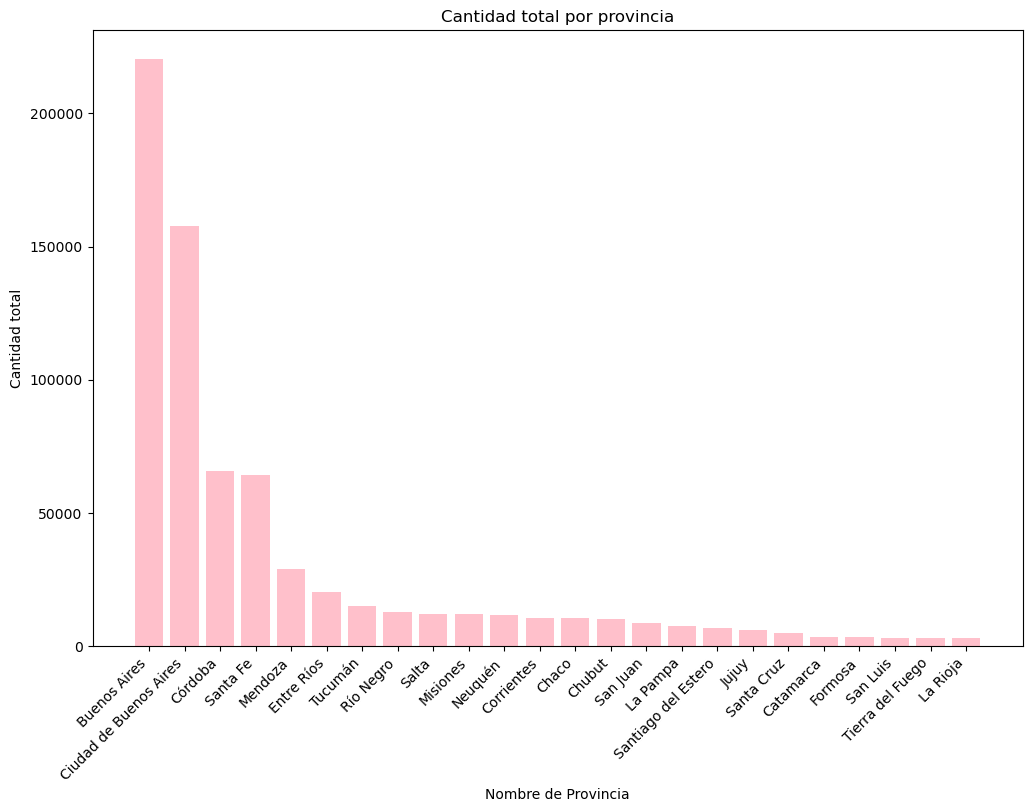

In [423]:
#Graficamos usando un histograma
plt.figure(figsize=(12,8))

le_corresponde_estab_ordenado = le_corresponde_estab.sort_values(by='cant_total', ascending=False)

plt.bar(le_corresponde_estab_ordenado['nombre_provincia'], le_corresponde_estab_ordenado['cant_total'],color='pink')

# Agregamos los titulos
plt.title('Cantidad total por provincia')
plt.xlabel('Nombre de Provincia')
plt.ylabel('Cantidad total')
plt.xticks(rotation=45, ha='right')  # Acomodamos para que se visualicen los nombres

plt.show()

Boxplot, por cada provincia, donde se pueda observar la cantidad de productos por operador

In [424]:
#Queremos crear una nueva tabla donde por cada razon social, tengamos la cantidad de productos que produce. La vamos a generar con SQL a partir de las tablas df_prod_org, df_oper_org y df_est_deptos_org

#Agrego departamento a la razon social
establecimiento_razon = sql^"""
                            SELECT o.razon_social, e.departamento, e.establecimiento
                            FROM df_oper_org AS o
                            INNER JOIN df_est_deptos_org AS e
                            ON o.establecimiento = e.establecimiento
                            WHERE e.establecimiento != 'NC'
"""

#Agrego la provincia
provincia_razon = sql^"""
                        SELECT e.razon_social, e.establecimiento, d.nombre_provincia
                        FROM establecimiento_razon AS e
                        INNER JOIN df_deptos AS d
                        ON e.departamento=UPPER(d.nombre_departamento)

"""

#Agrego los productos de la razon social
productos_operador = sql^"""
                        SELECT e.nombre_provincia, e.razon_social, COUNT(DISTINCT d.productos) AS cant_productos
                        FROM provincia_razon AS e
                        INNER JOIN df_prod_org AS d
                        ON e.establecimiento=d.establecimiento
                        GROUP BY e.nombre_provincia, e.razon_social
"""


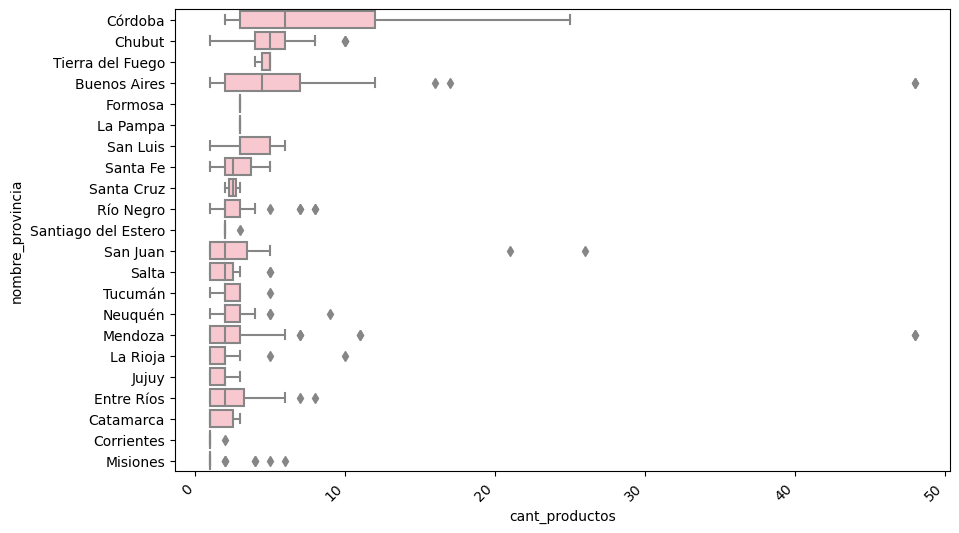

In [425]:
media_por_provincia = productos_operador.groupby('nombre_provincia')['cant_productos'].mean()

# Ordenamos las provincias por la media de 'cant_productos'
median_by_province = productos_operador.groupby('nombre_provincia')['cant_productos'].quantile(0.5)
order = median_by_province.sort_values(ascending=False).index

# Creamos el boxplot

plt.figure(figsize=(10,6))
sns.boxplot(data=productos_operador,y='nombre_provincia',x='cant_productos',color='pink',order=order)
plt.xticks(rotation=45, ha='right')  # Acomodamos para que se visualicen los nombres
plt.show()

Relación entre cantidad de establecimientos de operadores orgánicos certificados de cada provincia y la proporción de mujeres empleadas en establecimientos productivos de dicha provincia. Para este punto deberán generar una tabla de equivalencia, de manera manual, entre la letra de CLAE y el rubro de del operador orgánico.

In [426]:
## Analizamos el rubro de los productores organicos

print('RUBROS OPERADORES ORGANICOS',df_padron[df_padron["establecimiento"]!='NC']["rubro"].unique())
info = df_clae[['clae2','clae2_desc','letra']]

print("")

#Analizamos las descripciones de las clases con letra A
letraA = info[info["letra"]=='A']
print('CLAE CON LETRA A',letraA["clae2_desc"].unique())

RUBROS OPERADORES ORGANICOS ['AGRICULTURA' 'FRUTICULTURA/HORTICULTURA' 'GANADERIA' 'HORTICULTURA'
 'FRUTICULTURA' 'AGRICULTURA/GANADERIA' 'APICULTURA'
 'AGICULTURA/HORTICULTURA' 'RECOLECCION SILVESTRE'
 'AGICULTURA/FRUTICULTURA' 'FRUTICULTURA/AGRICULTURA'
 'GANADERIA/FRUTICULTURA' nan 'ACUICULTURA']

CLAE CON LETRA A ['Agricultura, ganadería, caza y servicios relacionados'
 'Silvicultura y explotación forestal' 'Pesca y acuicultura']


In [427]:
#Como vemos que los operadores organicos tienen CLAE con letra A, nos quedamos con esos establecimientos productivos
df_estab_prod_letraA = df_estab_prod[df_estab_prod["letra"]=='A']

In [428]:
# Agregamos la provincia a los establecimientos productivos
estab_prod_con_prov = sql^"""SELECT *
                             FROM df_estab_prod_letraA as e
                             INNER JOIN df_deptos as d
                             ON e.departamento = d.nombre_departamento"""

# Proporcion de mujeres por provincia
prop_muj_prov = sql^"""SELECT nombre_provincia, AVG(proporcion_mujeres) as prop_muj
                        FROM estab_prod_con_prov
                        GROUP BY nombre_provincia """

# Cantidad de establecimientos por provincia
estab_por_prov = sql^"""SELECT nombre_provincia, COUNT(ID) as cant_est
                        FROM estab_prod_con_prov
                         GROUP BY nombre_provincia """

# Hacemos Join de las dos ultimas tablas
prop_estab_por_prov = sql^"""SELECT p.nombre_provincia, p.prop_muj, e.cant_est
                FROM estab_por_prov as e
                INNER JOIN prop_muj_prov as p
                ON e.nombre_provincia=p.nombre_provincia"""

In [429]:
cantidad_prop_dep

,departamento,nombre_provincia,cantidad_establecimientos,media_prop_muj
0,CAPITAL CATAMARCA,Catamarca,91,0.075890
1,EL ALTO,Catamarca,4,0.000000
2,SAN JUSTO CORDOBA,Córdoba,1062,0.056138
3,TERCERO ARRIBA,Córdoba,510,0.038353
4,POCHO,Córdoba,3,0.000000
...,...,...,...,...
502,SARMIENTO SANTIAGO DEL ESTERO,Santiago del Estero,8,0.029750
503,SAN BLAS DE LOS SAUCES,La Rioja,2,0.050000
504,MAIPU BUENOS AIRES,Buenos Aires,85,0.085471
505,HIPOLITO YRIGOYEN,Buenos Aires,95,0.072989


<function matplotlib.pyplot.show(close=None, block=None)>

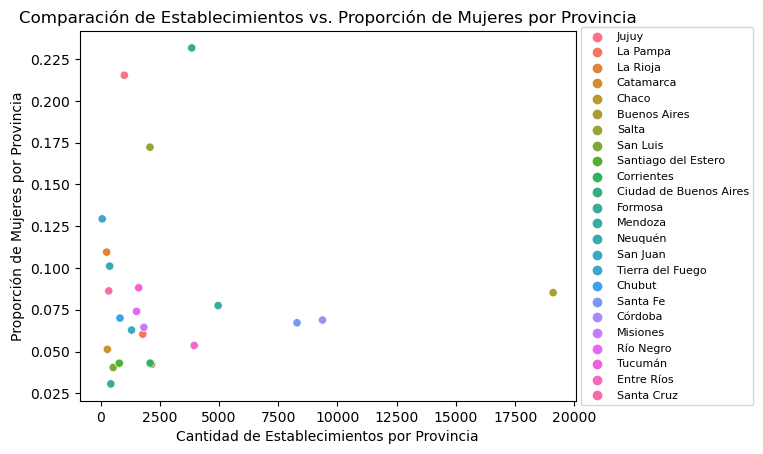

In [430]:
#Realizamos un scatterplot para poder analizar si existe relacion o no

sns.scatterplot(data=prop_estab_por_prov, x='cant_est', y='prop_muj',hue='nombre_provincia',palette='husl')
plt.xlabel('Cantidad de Establecimientos por Provincia')
plt.ylabel('Proporción de Mujeres por Provincia')
plt.title('Comparación de Establecimientos vs. Proporción de Mujeres por Provincia')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=8.0)
plt.show

In [431]:
#Analizamos ahora por departamento para ver si obtenemos mas informacion

# Cantidad establecimiento por departamento
cantidad_estab_por_dep = sql^""" SELECT e.departamento, COUNT(e.ID) as cantidad_est, d.nombre_provincia
                                FROM df_estab_prod_letraA as e
                                INNER JOIN df_deptos as d
                                ON e.departamento=d.nombre_departamento
                                 GROUP BY e.departamento,d.nombre_provincia """

# Proporcion mujeres por departamento
prop_por_dep = sql^""" SELECT e.departamento, AVG(e.proporcion_mujeres) as media_prop_muj, d.nombre_provincia
                                FROM df_estab_prod_letraA as e
                                INNER JOIN df_deptos as d
                                ON e.departamento=d.nombre_departamento
                                GROUP BY e.departamento, nombre_provincia """

cantidad_prop_dep = sql^""" SELECT p.departamento, p.nombre_provincia, e.cantidad_est as cantidad_establecimientos, p.media_prop_muj
                FROM cantidad_estab_por_dep as e
                INNER JOIN prop_por_dep as p
                ON p.departamento=e.departamento"""


In [432]:
cantidad_prop_dep

,departamento,nombre_provincia,cantidad_establecimientos,media_prop_muj
0,CAPITAL CATAMARCA,Catamarca,91,0.075890
1,EL ALTO,Catamarca,4,0.000000
2,SAN JUSTO CORDOBA,Córdoba,1062,0.056138
3,TERCERO ARRIBA,Córdoba,510,0.038353
4,POCHO,Córdoba,3,0.000000
...,...,...,...,...
502,SARMIENTO SANTIAGO DEL ESTERO,Santiago del Estero,8,0.029750
503,SAN BLAS DE LOS SAUCES,La Rioja,2,0.050000
504,MAIPU BUENOS AIRES,Buenos Aires,85,0.085471
505,HIPOLITO YRIGOYEN,Buenos Aires,95,0.072989


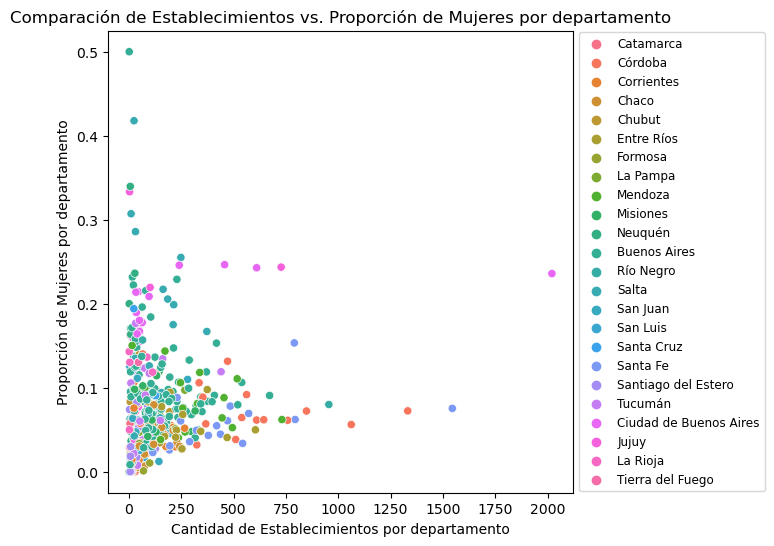

In [433]:
# Realizamos el scatterplot por departamento

plt.figure(figsize=(6,6))
sns.scatterplot(data=cantidad_prop_dep, x='cantidad_establecimientos', y='media_prop_muj',hue='nombre_provincia',palette='husl')
plt.xlabel('Cantidad de Establecimientos por departamento')
plt.ylabel('Proporción de Mujeres por departamento')
plt.title('Comparación de Establecimientos vs. Proporción de Mujeres por departamento')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=8.6)
plt.show()

¿Cuál es la distribución de los datos correspondientes a la proporción de mujeres empleadas en establecimientos productivos en Argentina? Realicen un violinplot por cada provincia. Mostrarlo en un solo gráfico.

In [434]:
# Creo una tabla donde tenga provincia, departamento y proporcion de mujeres en ese establecimiento
prov_prop_muj = sql^"""
                    SELECT d.nombre_provincia, e.proporcion_mujeres
                    FROM df_deptos AS d
                    INNER JOIN df_estab_prod AS e
                    ON d.nombre_departamento = e.departamento
                    WHERE e.letra='A'
"""

# Cada entrada es un establecimiento, por lo que pueden haber repetidos, igualmente los queremos conservar porque vamos a cuantificar cantidades

<AxesSubplot:xlabel='nombre_provincia', ylabel='proporcion_mujeres'>

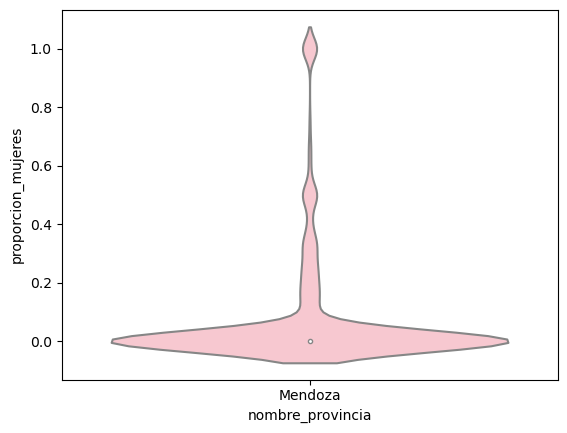

In [435]:
#Podemos ver que en Mendoza hay mucha mas densidad de valores cercanos al 0.

sns.violinplot(data=prov_prop_muj[prov_prop_muj['nombre_provincia']=='Mendoza'], x='nombre_provincia', y='proporcion_mujeres',color='pink')

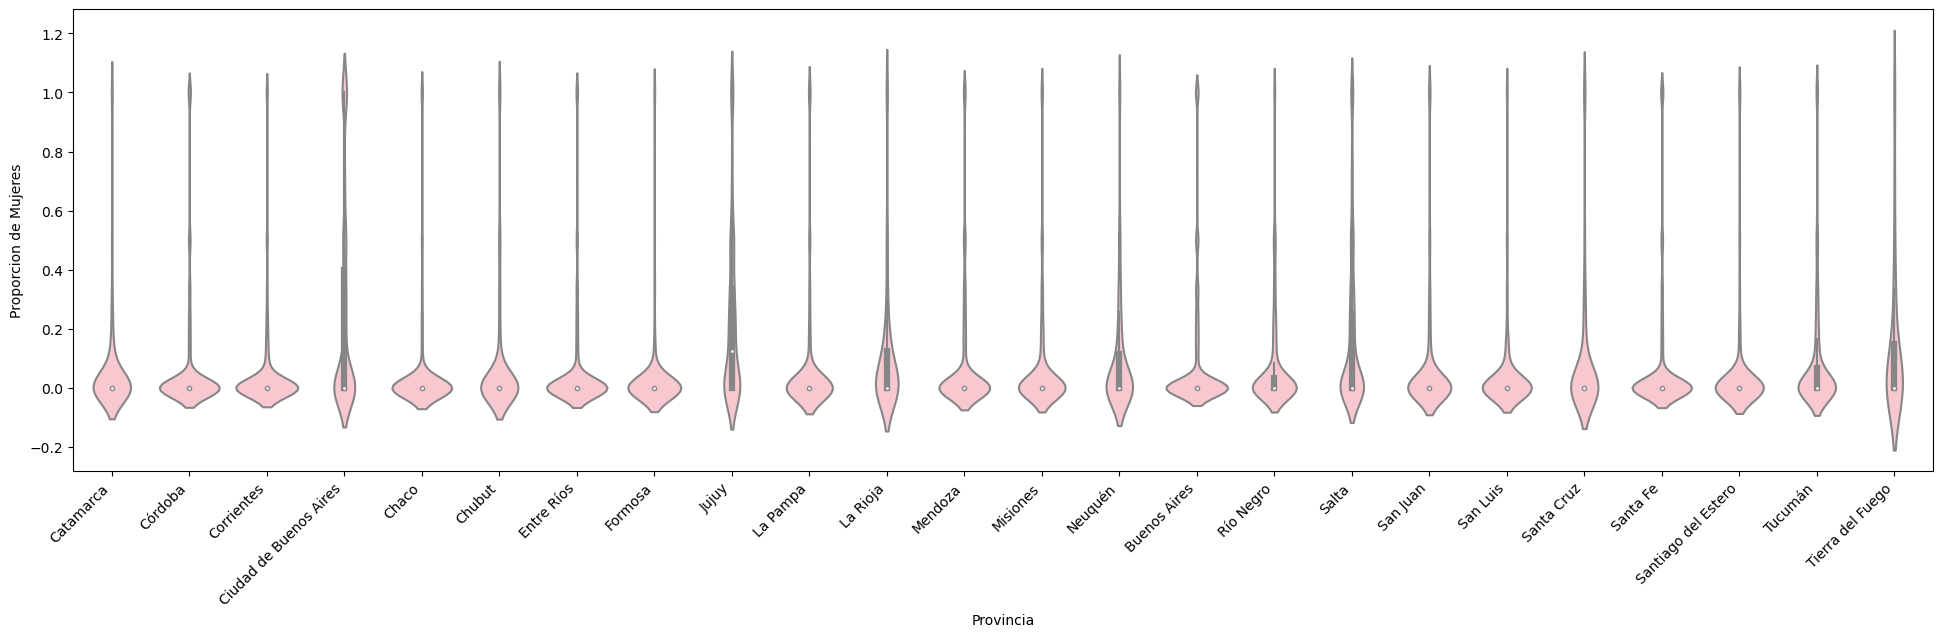

In [436]:
#Creamos el violinplot por provincia
plt.figure(figsize=(24,6))

sns.violinplot(data=prov_prop_muj, x='nombre_provincia', y='proporcion_mujeres',color="pink")

plt.xlabel('Provincia')
plt.ylabel('Proporcion de Mujeres')
plt.xticks(rotation=45, ha='right')

plt.show()

In [437]:
#Podemos ver que generalmente la distribucion suele ser mayor en torno al 0, y que en valores intermedios entre 0 y 1 no suele haber mucha info.
#Se puede ver que el promedio es 0.078 y que la desviacion estandar es 0.21 lo que nos dice que los resultados estan muy distribuidos respecto al 0. Tambien vemos que los cuantiles 0.25, 0.5 y 0.75, son todos 0.

prov_prop_muj.describe()

,proporcion_mujeres
count,68854.000000
mean,0.085492
std,0.219237
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [438]:
#Vemos que de 98.621 establecimientos, 79.451 no tienen ninguna mujer. Esto tambien podria deberse a una irresponsabilidad de parte de los establecimientos al cargar los datos.
prov_prop_muj['proporcion_mujeres'].value_counts()

0.000    54413
1.000     2469
0.500     1994
0.333     1447
0.250     1100
         ...  
0.166        1
0.611        1
0.804        1
0.221        1
0.516        1
Name: proporcion_mujeres, Length: 429, dtype: int64

Finalmente, se desea que intenten mostrar si existe cierta relación entre el desarrollo
de la actividad orgánica y la proporción de mujeres empleadas en establecimientos
productivos de las provincias.”. En caso de que aún no lo hayan hecho, ¿qué información
les parece que deberían mostrar que aún no han mostrado? Enumerar y mostrar los
resultados.


## Ejercicios recuperatorio

### Consulta sql

In [458]:
cantidad_deptos_provincia = sql^"""SELECT nombre_provincia, COUNT(nombre_departamento) AS cantidad_deptos
                            FROM df_deptos
                            GROUP BY nombre_provincia
                            ORDER BY cantidad_deptos DESC

"""

lista_deptos_provincia = sql^"""SELECT d.nombre_provincia, d.nombre_departamento
                                FROM df_deptos as d
                                INNER JOIN cantidad_deptos_provincia as c
                                ON d.nombre_provincia=c.nombre_provincia
                                ORDER BY c.cantidad_deptos DESC, d.nombre_provincia ASC, d.nombre_departamento ASC
                            """

### Visualizacion

Mostrar, utilizando herramientas de visualización, la siguiente información:
ii) Cantidad de Establecimientos Productivos (CEP) vs. Cantidad de Establecimientos de Productores Orgánicos (CEO) de cada Provincia. 
Es decir, contarían con 24 pares de datos (CEP, CEO) para graficar.

In [507]:
cant_emp_org_prov[cant_emp_org_prov['nombre_provincia']=='Formosa']

,departamento,nombre_provincia,cantidad_operadores
75,PILCOMAYO,Formosa,1


In [490]:
#cantidad de establecimientos productivos por provincia
le_corresponde_estab

#cantidad de establecimientos organicos productivos por provincia
cant_organico_prov = sql^"""SELECT nombre_provincia, SUM(cantidad_operadores) AS cantidad
                            FROM cant_emp_org_prov
                            GROUP BY nombre_provincia
"""

#JOIN entre ambas tablas
cantidad_estab_org_noorg_prov = sql^"""SELECT DISTINCT l.nombre_provincia, c.cantidad AS cantidad_organicos, l.cant_total AS cantidad_estab
                                    FROM le_corresponde_estab as l
                                    LEFT OUTER JOIN cant_organico_prov as c
                                    ON c.nombre_provincia=l.nombre_provincia
                                    ORDER BY c.nombre_provincia

"""

# OBSERVACION: Ciudad de Buenos Aires y Chaco no figuran

In [497]:
sns.lmplot(data='cantidad_estab_org_noorg_prov',x='cantidad_organicos',y='cantidad_estab').set()

ValueError: Could not interpret value `cantidad_organicos` for parameter `x`

In [501]:
cantidad_estab_org_noorg_prov

,nombre_provincia,cantidad_organicos,cantidad_estab
0,Buenos Aires,100.0,220261
1,Catamarca,6.0,3609
2,Chubut,27.0,10265
3,Corrientes,6.0,10718
4,Córdoba,9.0,65736
5,Entre Ríos,28.0,20460
6,Formosa,1.0,3342
7,Jujuy,6.0,6224
8,La Pampa,2.0,7726
9,La Rioja,31.0,3006


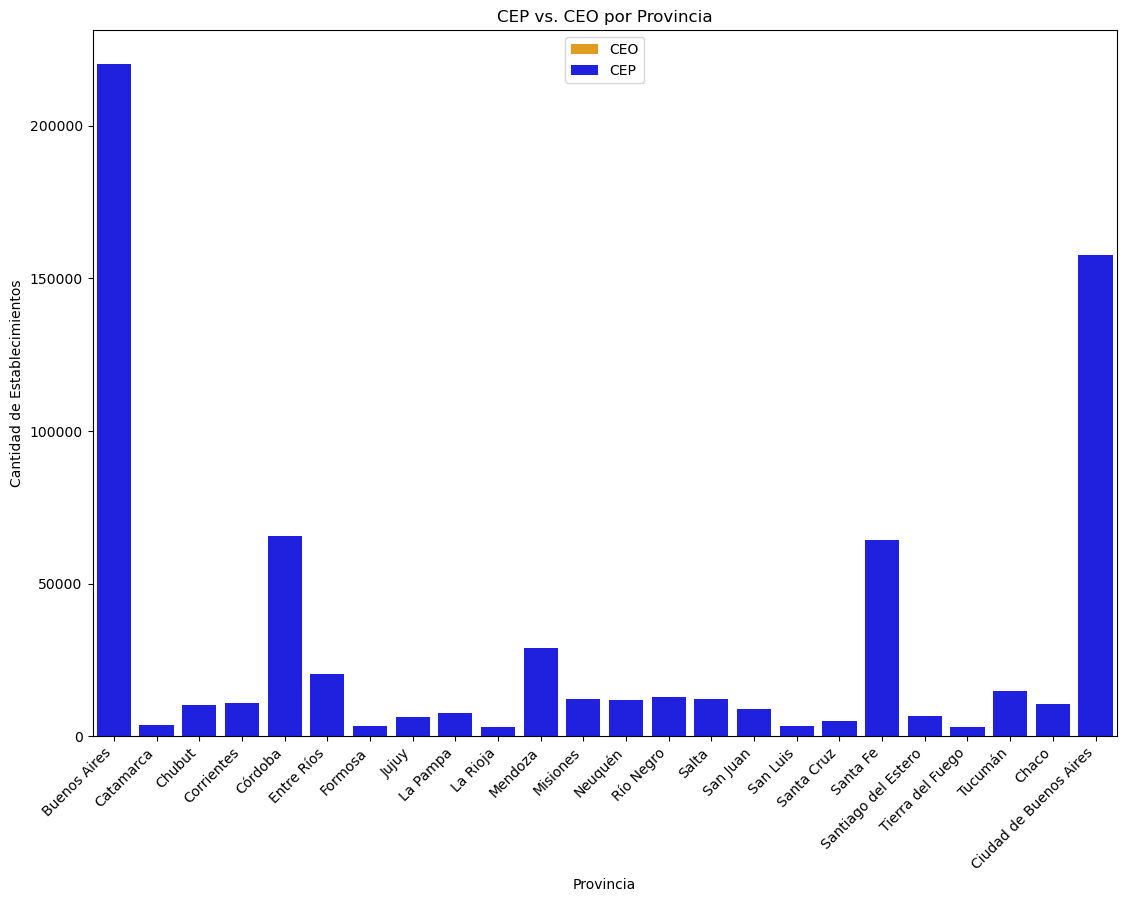

In [504]:
# Gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
sns.barplot(data=cantidad_estab_org_noorg_prov, x='nombre_provincia', y='cantidad_organicos', color='orange', label='CEO')
sns.barplot(data=cantidad_estab_org_noorg_prov, x='nombre_provincia', y='cantidad_estab', color='blue', label='CEP')

# Añadir títulos y etiquetas
plt.title('CEP vs. CEO por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Establecimientos')
plt.legend()

# Ajustar el diseño para que se visualicen todos los elementos
plt.tight_layout()
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

In [499]:
cantidad_estab_org_noorg_prov

,nombre_provincia,cantidad_organicos,cantidad_estab
0,Buenos Aires,100.0,220261
1,Catamarca,6.0,3609
2,Chubut,27.0,10265
3,Corrientes,6.0,10718
4,Córdoba,9.0,65736
5,Entre Ríos,28.0,20460
6,Formosa,1.0,3342
7,Jujuy,6.0,6224
8,La Pampa,2.0,7726
9,La Rioja,31.0,3006
